In [14]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# science kit library
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# evaluation metrics for checking which giving better output 
# metrics through checking the which will give better output close one's
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# warnings ignore
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv("car data.csv")
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [16]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [17]:
# Data Preprocessing
# We drop the Car_Name.
# We will take the numerical features as it is.
# We will one hot encode the categorical variables

In [18]:
pair_df = [data[["Year", "Present_Price", "Kms_Driven", "Owner"]], 
           pd.get_dummies(data[["Fuel_Type", "Seller_Type", "Transmission"]], drop_first=True), data[["Selling_Price"]]]
X = pd.concat(pair_df, axis=1)
y = data[["Selling_Price"]]

In [19]:
# Lets have a look into processed data
X.head()

,Year,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Selling_Price
0,2014,5.59,27000,0,0,1,0,1,3.35
1,2013,9.54,43000,0,1,0,0,1,4.75
2,2017,9.85,6900,0,0,1,0,1,7.25
3,2011,4.15,5200,0,0,1,0,1,2.85
4,2014,6.87,42450,0,1,0,0,1,4.60


In [20]:
# Dependent variable
y.head()

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60


***

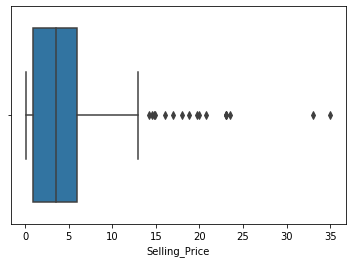

In [21]:
# Removing Outliers - always based on Target
sns.boxplot(data=data, x="Selling_Price")
plt.show()

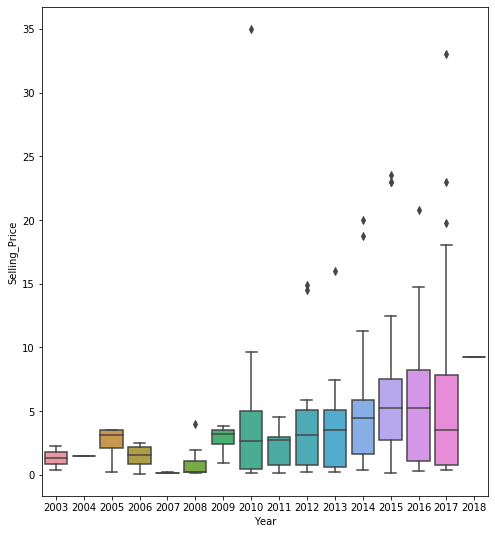

In [22]:
plt.figure(figsize=(8,9))
sns.boxplot(data=data, x="Year", y="Selling_Price")
plt.show()

In [23]:
from scipy.stats import skew

In [25]:
data_num = data.select_dtypes(["int64", "float64"])

Year : -1.2399702494847509


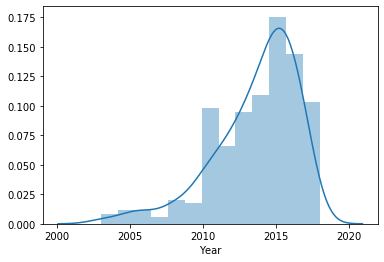

-------------------------------------------------------------
Selling_Price : 2.480979484005291


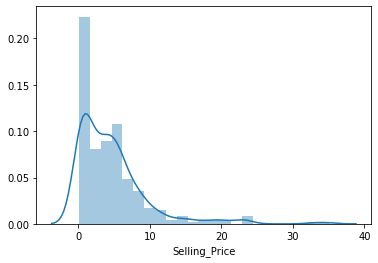

-------------------------------------------------------------
Present_Price : 4.062773999428537


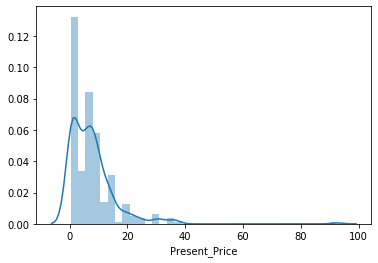

-------------------------------------------------------------
Kms_Driven : 6.403895025283172


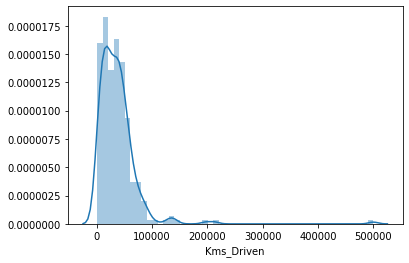

-------------------------------------------------------------
Owner : 7.578839290299513


RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

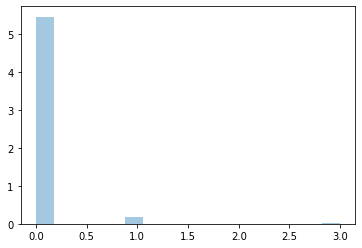

In [27]:
for col in data_num:
    print(col,":", skew(data_num[col]))
    sns.distplot(data_num[col])
    plt.show()
    print("-------------------------------------------------------------")

In [ ]:
data_num['Selling_Price'] = np.log(data_num['Selling_Price'])

In [ ]:
print(skew(data_num['Selling_Price']))
sns.distplot(data_num['Selling_Price'])
plt.show()

In [ ]:
data_num['Kms_Driven'] = np.log(data_num['Kms_Driven'])

In [ ]:
print(skew(data_num['Kms_Driven']))
sns.distplot(data_num['Kms_Driven'])
plt.show()


In [ ]:
# Correlation of features with dependent variables
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.figure(figsize=(16,8))
corrmat = X.corr()
# picking the top 10 correlated features
cols = corrmat.index
cm = np.corrcoef(X[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
# Let's delete the Selling_Price from X
X.drop(labels=["Selling_Price"], axis=1, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)


In [ ]:
# Shape of the dataset
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

In [ ]:
# Applying Linear Regression
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

In [ ]:
# MSE on training data
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true=y_train, y_pred=linreg.predict(X_train))

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_true=y_train, y_pred=linreg.predict(X_train))

In [ ]:
# R squared on training data
# This method returns R squared value
# This will first predict the values for X_train since our model is already fit and ten will calculate the R^2 value
linreg.score(X_train, y_train)

In [ ]:
# We will get the same value with r2_score function also
from sklearn.metrics import r2_score
r2_score(y_true=y_train, y_pred=linreg.predict(X_train))

In [ ]:
# Lets check the metrics on test data
mse = mean_squared_error(y_true=y_test, y_pred=linreg.predict(X_test))
mae = mean_absolute_error(y_true=y_test, y_pred=linreg.predict(X_test))
r2 = linreg.score(X_test, y_test)

print("MSE on test data: ", mse)
print("MAE on test data: ", mae)
print("R squared on test data: ", r2)

In [ ]:
np.round(linreg.coef_.ravel(), 3)

In [ ]:
X.head()

In [ ]:
# Bias term in our model 
linreg.intercept_

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# For training data
plt.figure(figsize=(20, 10))
plt.plot(range(0, len(y_train)), y_train, label="TrueValues", marker="*", linewidth=3)
plt.plot(range(0, len(y_train)), linreg.predict(X_train), label="PredictedValues", marker="*", linewidth=3)
plt.xlabel("Indices",fontsize=20)
plt.ylabel("Selling Price of Cars",fontsize=20)
plt.title("True Selling Price Vs. Predicted Selling Price",fontsize=20)
plt.show()

In [ ]:
# For Test data
plt.figure(figsize=(20, 10))
plt.plot(range(0, len(y_test)), y_test, label="TrueValues", marker="*", linewidth=3)
plt.plot(range(0, len(y_test)), linreg.predict(X_test), label="PredictedValues", marker="o", linewidth=3)
plt.xlabel("Indices",fontsize=20)
plt.ylabel("Selling Price of Cars",fontsize=20)
plt.title("True Selling Price Vs. Predicted Selling Price",fontsize=20)
plt.legend()
plt.show()

In [ ]:
# Applying Ridge Regression
def plot_prices(y, y_pred, data_string):
    plt.figure(figsize=(20, 10))
    plt.plot(range(0, len(y)), y, label="TrueValues", marker="*", linewidth=3)
    plt.plot(range(0, len(y)), y_pred, label="PredictedValues", marker="o", linewidth=3)
    plt.xlabel("Indices", fontsize=20)
    plt.ylabel("Selling Price of Cars", fontsize=20)
    plt.title("True Vs. Predicted S.P. - " + data_string, fontsize=20)
    plt.legend()

In [ ]:
def apply_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    
    # Train data 
    mse = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))
    mae = mean_absolute_error(y_true=y_train, y_pred=model.predict(X_train))
    r2 = model.score(X_train, y_train)

    print("MSE on train data: ", mse)
    print("MAE on train data: ", mae)
    print("R squared on train data: ", r2)  
    
    print()
    print("#"*50)
    print()
    
    # Test data 
    mse = mean_squared_error(y_true=y_test, y_pred=linreg.predict(X_test))
    mae = mean_absolute_error(y_true=y_test, y_pred=linreg.predict(X_test))
    r2 = linreg.score(X_test, y_test)

    print("MSE on test data: ", mse)
    print("MAE on test data: ", mae)
    print("R squared on test data: ", r2)
    
    print()
    print("#"*50)
    print()
    
    plot_prices(y_train, model.predict(X_train), "TRAINING SET")
    
    plot_prices(y_test, model.predict(X_test), "TEST SET")

In [ ]:
from sklearn.linear_model import Ridge
ridreg = Ridge()

In [ ]:
apply_model(ridreg, X_train, y_train, X_test, y_test)